In [1]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import seaborn as sns

In [2]:
data = R'traveltime.csv'
time_df = pd.read_csv(data)
time_df.head()

,Miles,Number of deliveries,Gas price,Travel time
0,89,4,3.84,7.0
1,66,1,3.19,5.4
2,78,3,3.78,6.6
3,111,6,3.89,7.4
4,44,1,3.57,4.8


In [3]:
time_df.shape

(9, 4)

In [4]:
time_df.rename(columns={'Miles':'mile', 
                        'Number of deliveries':'num_of_del',
                       'Gas price':'price',
                       'Travel time':'time'},
                       inplace=True)

In [5]:
time_df.head()

,mile,num_of_del,price,time
0,89,4,3.84,7.0
1,66,1,3.19,5.4
2,78,3,3.78,6.6
3,111,6,3.89,7.4
4,44,1,3.57,4.8


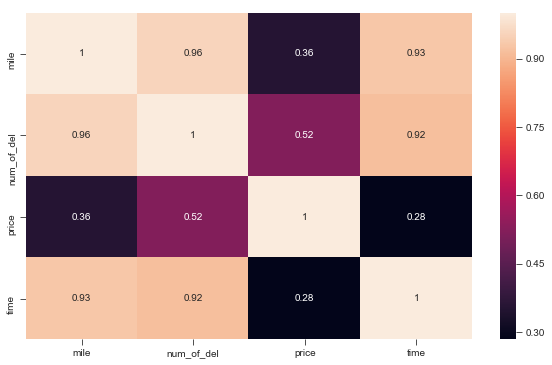

In [6]:
corr_data = time_df.corr()
plt.figure(figsize=(10, 6))
sns.set_style('ticks')
sns.heatmap(corr_data, annot=True)
plt.show()

In [7]:
data = time_df[['mile','num_of_del','price','time']]
data.head()

,mile,num_of_del,price,time
0,89,4,3.84,7.0
1,66,1,3.19,5.4
2,78,3,3.78,6.6
3,111,6,3.89,7.4
4,44,1,3.57,4.8


In [8]:
def standardize(data_features):
    data_features = (data_features - data_features.mean()) /   data_features.std()
    return data_features

In [9]:
std_data = data.apply(standardize, axis=0)
std_data.head()

,mile,num_of_del,price,time
0,0.425210,0.525509,1.025146,0.664365
1,-0.661438,-1.248084,-1.246484,-1.075063
2,-0.094491,-0.065689,0.815457,0.229508
3,1.464612,1.707904,1.199887,1.099221
4,-1.700840,-1.248084,0.081546,-1.727348


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(std_data.values, i) for i in range(std_data.shape[1])]
vif["features"] = std_data.columns
vif

,VIF_Factor,features
0,18.226452,mile
1,26.488238,num_of_del
2,2.454586,price
3,9.575057,time


In [11]:
std_data.drop(['num_of_del'], axis=1, inplace=True)

In [12]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(std_data.values, i) for i in range(std_data.shape[1])]
vif["features"] = std_data.columns
vif
# This outputs the following:-

,VIF_Factor,features
0,7.965546,mile
1,1.165860,price
2,7.571427,time


In [13]:
# Save the un-standardized data with moderate VIF attributes as X
X = data[['mile','price']]
# Define a column of ones, the length of X
ones = np.ones(len(X), dtype= 'int8')
# Insert The column of ones to the first position of X
X.insert(0, 'Ones', ones)
# Display first 5 rows of X
X.head()

,Ones,mile,price
0,1,89,3.84
1,1,66,3.19
2,1,78,3.78
3,1,111,3.89
4,1,44,3.57


In [14]:
y = time_df.time
y.head()

0    7.0
1    5.4
2    6.6
3    7.4
4    4.8
Name: time, dtype: float64

In [15]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
model_slope = model.coef_

In [17]:
model_intercept = model.intercept_

In [18]:
print('Slope =',model_slope,'\nIntercept = ',model_intercept)

Slope = [ 0.          0.04124856 -0.17043301] 
Intercept =  3.6934727681099355


In [19]:
def predict(x):
    x = list(x)
    x = model_intercept + x[0]*model_slope[0] + x[1]*model_slope[1] + x[2]*model_slope[2]
    return x

In [21]:
x = []
x.append(0)

print('ENTER MILES FOR TRAVEL TIME PREDICTION:')
x = x + [float(input())]
print('ENTER GAS PRICE FOR TRAVEL TIME PREDICTION:')
x = x + [float(input())]
Z = predict(x)
print('PREDICTED VALUE OF TRAVEL TIME IS:',Z)

ENTER MILES FOR TRAVEL TIME PREDICTION:
45
ENTER GAS PRICE FOR TRAVEL TIME PREDICTION:
34
PREDICTED VALUE OF TRAVEL TIME IS: -0.24506406776336753
